In [72]:
import matplotlib.pyplot as plt
#%matplotlib inline
from matplotlib import collections as mc
import warnings
import numpy as np
import time
import os
from apgl.graph import VertexList
from scipy.io import mmread, mminfo
import networkx as nx 
warnings.filterwarnings('ignore')

In [73]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
def drawlinegraphA(graph, X, algo="Algo"):
    gridsize = (1, len(X))
    fig = plt.figure(figsize=(16, 4))
    hfont = {'fontname':'Times'}
    for i in range(len(X)):
        ax = plt.subplot2grid(gridsize, (0, i))
        plt.axis('off')
        ax.set_title(algo[i], fontsize = 14, color='green', fontweight='bold', **hfont)
        ax.set_xlim(min(X[i][:,0]), max(X[i][:,0]))
        ax.set_ylim(min(X[i][:,1]), max(X[i][:,1]))
        lines = []
        e = 0
        for j,k in zip(*graph.nonzero()):
            if j>k:
                lines.append([X[i][j], X[i][k]])
            e += 1
        #print ("Total edges = ", e, " Average Degree:", sum(d for n,d in G.degree()) / float(len(G)))
        lc = mc.LineCollection(lines, linewidths=.3, color="blue")
        ax.add_collection(lc)
        plt.axis('off')

In [75]:
def readCoordinates(filename):
    corfile = open(filename)
    X = []
    for line in corfile.readlines():
        l = line.split("\t")
        X.append([float(l[0]), float(l[1])])
    X = np.array(X)
    corfile.close()
    return X

In [113]:
#filename = "datasets/input/finput/3elt_dual.mtx"
#filename = "datasets/input/finput/USpowerGrid.mtx"
#filename = "datasets/input/finput/sf_ba6000.mtx"
#filename = "datasets/input/finput/bodyy6.mtx"
#filename = "datasets/input/finput/fe_4elt2.mtx"
#filename = "datasets/input/finput/pkustk01.mtx"
#filename = "datasets/input/finput/finance256.mtx"
#filename = "datasets/input/finput/pkustk02.mtx"
#filename = "datasets/input/finput/finan512.mtx"
#filename = "datasets/input/finput/PGPgiantcompo.mtx"
filename = "datasets/input/finput/OPF_6000.mtx"

graph = mmread(filename)
G = nx.Graph()
for i in range(mminfo(filename)[0]):
    G.add_node(i)
for i,j in zip(*graph.nonzero()):
    if i > j:
        G.add_edge(i, j)

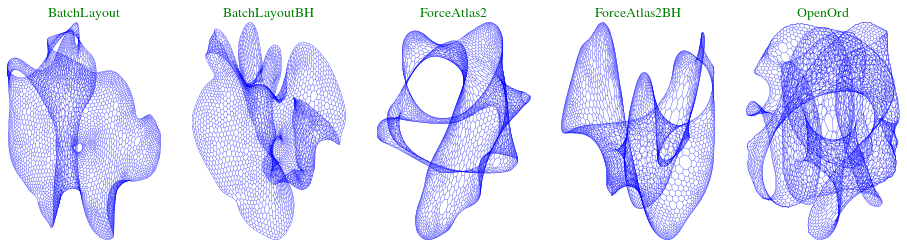

In [81]:
algoBH3elt_dual = readCoordinates("datasets/outputconverged/3elt_dual.mtxBHMINB256PARAOUT1410.txt")
algo23elt_dual = readCoordinates("datasets/outputconverged/3elt_dual.mtxCACHEMINB256PARAOUT1410.txt")
openordGH3elt_dual = readCoordinates("datasets/outputconverged/3elt_dual.icoord.txt")
forceatlas23elt_dual = readCoordinates("datasets/outputconverged/3elt_dual.mtx.gml_forceatlas2_1410.gml.txt")
forceatlas2bh3elt_dual = readCoordinates("datasets/outputconverged/3elt_dual.mtx.gml_forceatlas2bh_1410.gml.txt")
drawlinegraphA(graph, [algo23elt_dual, algoBH3elt_dual, forceatlas23elt_dual, forceatlas2bh3elt_dual,
                       openordGH3elt_dual], ["BatchLayout", "BatchLayoutBH" , "ForceAtlas2", 
                                                             "ForceAtlas2BH", "OpenOrd"])

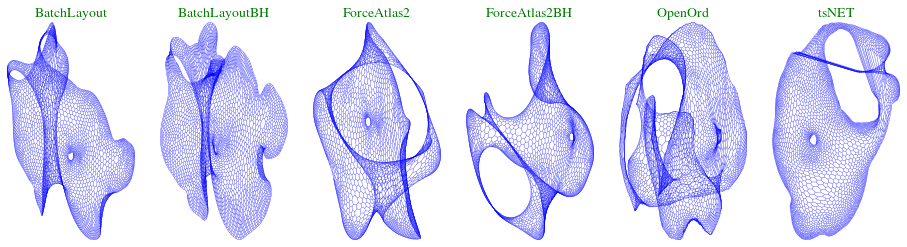

In [83]:
algoBH3elt_dual = readCoordinates("datasets/betteroutput/3elt_dual.mtxBHMINB256PARAOUT5000.txt")
algo23elt_dual = readCoordinates("datasets/betteroutput/3elt_dual.mtxCACHEMINB256PARAOUT5000.txt")
openordGH3elt_dual = readCoordinates("datasets/betteroutput/3elt_dual.icoord.txt")
forceatlas23elt_dual = readCoordinates("datasets/betteroutput/3elt_dual.mtx.gml_forceatlas2_5000.gml.txt")
forceatlas2bh3elt_dual = readCoordinates("datasets/betteroutput/3elt_dual.mtx.gml_forceatlas2bh_5000.gml.txt")
tsNETUSpowerGrid = readCoordinates("datasets/betteroutput/3elt_dual.mtx.gml.vna_tsNET_500.txt")
drawlinegraphA(graph, [algo23elt_dual, algoBH3elt_dual, forceatlas23elt_dual, forceatlas2bh3elt_dual,
                       openordGH3elt_dual, tsNETUSpowerGrid], ["BatchLayout", "BatchLayoutBH" , "ForceAtlas2", 
                                                             "ForceAtlas2BH", "OpenOrd", "tsNET"])

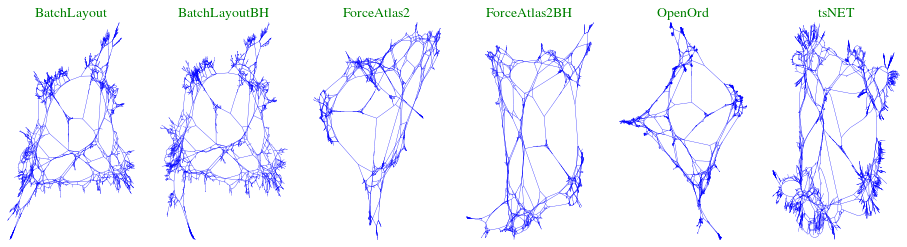

In [87]:
algoBHUSpowerGrid = readCoordinates("datasets/outputconverged/USpowerGrid.mtxBHMINB256PARAOUT12445.txt")
algo2USpowerGrid = readCoordinates("datasets/outputconverged/USpowerGrid.mtxCACHEMINB256PARAOUT12445.txt")
openordGHUSpowerGrid = readCoordinates("datasets/outputconverged/USpowerGrid.icoord.txt")
forceatlas2USpowerGrid = readCoordinates("datasets/outputconverged/USpowerGrid.mtx.gml_forceatlas2_12445.gml.txt")
forceatlas2bhUSpowerGrid = readCoordinates("datasets/outputconverged/USpowerGrid.mtx.gml_forceatlas2bh_12445.gml.txt")
tsNETUSpowerGrid = readCoordinates("datasets/betteroutput/USpowerGrid.mtx.gml.vna_tsNETs_500.txt")
drawlinegraphA(graph, [algo2USpowerGrid, algoBHUSpowerGrid, forceatlas2USpowerGrid, forceatlas2bhUSpowerGrid,
                       openordGHUSpowerGrid, tsNETUSpowerGrid], ["BatchLayout", "BatchLayoutBH" , "ForceAtlas2", 
                                                             "ForceAtlas2BH", "OpenOrd", "tsNET"])

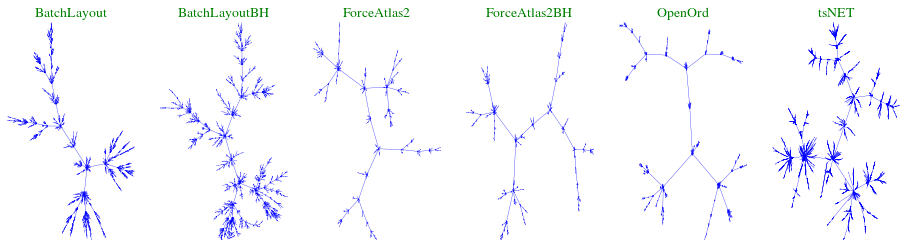

In [90]:
algoBHsf_ba6000 = readCoordinates("datasets/outputconverged/sf_ba6000.mtxBHMINB256PARAOUT9216.txt")
algo2sf_ba6000 = readCoordinates("datasets/outputconverged/sf_ba6000.mtxCACHEMINB256PARAOUT9216.txt")
openordGHsf_ba6000 = readCoordinates("datasets/outputconverged/sf_ba6000.icoord.txt")
forceatlas2sf_ba6000 = readCoordinates("datasets/outputconverged/sf_ba6000.mtx.gml_forceatlas2_9216.gml.txt")
forceatlas2bhsf_ba6000 = readCoordinates("datasets/outputconverged/sf_ba6000.mtx.gml_forceatlas2bh_9216.gml.txt")
tsNETsf_ba6000 = readCoordinates("datasets/betteroutput/sf_ba6000.mtx.gml.vna_tsNETs_500.txt")
drawlinegraphA(graph, [algo2sf_ba6000, algoBHsf_ba6000, forceatlas2sf_ba6000, forceatlas2bhsf_ba6000,
                       openordGHsf_ba6000, tsNETsf_ba6000], ["BatchLayout", "BatchLayoutBH" , "ForceAtlas2", 
                                                             "ForceAtlas2BH", "OpenOrd", "tsNET"])

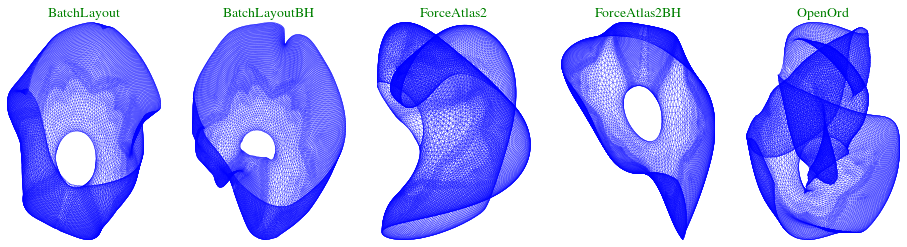

In [93]:
algoBH = readCoordinates("datasets/outputconverged/bodyy6.mtxBHMINB256PARAOUT2042.txt")
algo2 = readCoordinates("datasets/outputconverged/bodyy6.mtxCACHEMINB256PARAOUT2042.txt")
openordGH = readCoordinates("datasets/outputconverged/bodyy6.icoord.txt")
forceatlas2 = readCoordinates("datasets/outputconverged/bodyy6.mtx.gml_forceatlas2_2042.gml.txt")
forceatlas2bh = readCoordinates("datasets/outputconverged/bodyy6.mtx.gml_forceatlas2bh_2042.gml.txt")
drawlinegraphA(graph, [algo2, algoBH, forceatlas2, forceatlas2bh,
                       openordGH], ["BatchLayout", "BatchLayoutBH" , "ForceAtlas2", 
                                                             "ForceAtlas2BH", "OpenOrd"])

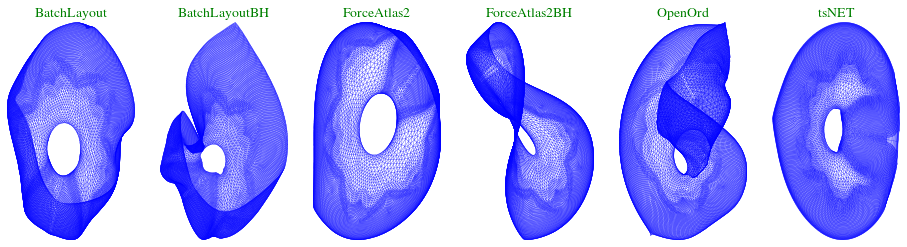

In [95]:
algoBH = readCoordinates("datasets/betteroutput/bodyy6.mtxBHMINB256PARAOUT5000.txt")
algo2 = readCoordinates("datasets/betteroutput/bodyy6.mtxCACHEMINB256PARAOUT5000.txt")
openordGH = readCoordinates("datasets/betteroutput/bodyy6.icoord.txt")
forceatlas2 = readCoordinates("datasets/betteroutput/bodyy6.mtx.gml_forceatlas2_5000.gml.txt")
forceatlas2bh = readCoordinates("datasets/betteroutput/bodyy6.mtx.gml_forceatlas2bh_5000.gml.txt")
tsNET = readCoordinates("datasets/betteroutput/bodyy6.mtx.gml.vna_tsNET_500.txt")
drawlinegraphA(graph, [algo2, algoBH, forceatlas2, forceatlas2bh,
                       openordGH, tsNET], ["BatchLayout", "BatchLayoutBH" , "ForceAtlas2", 
                                                             "ForceAtlas2BH", "OpenOrd", "tsNET"])

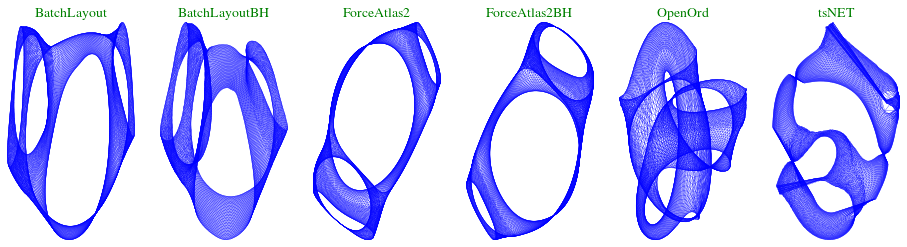

In [97]:
algoBH = readCoordinates("datasets/betteroutput/fe_4elt2.mtxBHMINB256PARAOUT5000.txt")
algo2 = readCoordinates("datasets/betteroutput/fe_4elt2.mtxCACHEMINB256PARAOUT5000.txt")
openordGH = readCoordinates("datasets/betteroutput/fe_4elt2.icoord.txt")
forceatlas2 = readCoordinates("datasets/betteroutput/fe_4elt2.mtx.gml_forceatlas2_5000.gml.txt")
forceatlas2bh = readCoordinates("datasets/betteroutput/fe_4elt2.mtx.gml_forceatlas2bh_5000.gml.txt")
tsNET = readCoordinates("datasets/betteroutput/fe_4elt2.mtx.gml.vna_tsNET_500.txt")
drawlinegraphA(graph, [algo2, algoBH, forceatlas2, forceatlas2bh,
                       openordGH, tsNET], ["BatchLayout", "BatchLayoutBH" , "ForceAtlas2", 
                                                             "ForceAtlas2BH", "OpenOrd", "tsNET"])

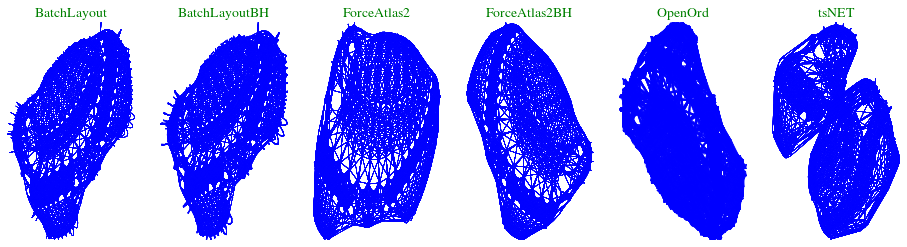

In [100]:
algoBH = readCoordinates("datasets/outputconverged/pkustk01.mtxBHMINB256PARAOUT8995.txt")
algo2 = readCoordinates("datasets/outputconverged/pkustk01.mtxCACHEMINB256PARAOUT8995.txt")
openordGH = readCoordinates("datasets/outputconverged/pkustk01.icoord.txt")
forceatlas2 = readCoordinates("datasets/outputconverged/pkustk01.mtx.gml_forceatlas2_8995.gml.txt")
forceatlas2bh = readCoordinates("datasets/outputconverged/pkustk01.mtx.gml_forceatlas2bh_8995.gml.txt")
tsNET = readCoordinates("datasets/betteroutput/pkustk01.mtx.gml.vna_tsNETs_500.txt")
drawlinegraphA(graph, [algo2, algoBH, forceatlas2, forceatlas2bh,
                       openordGH, tsNET], ["BatchLayout", "BatchLayoutBH" , "ForceAtlas2", 
                                                             "ForceAtlas2BH", "OpenOrd", "tsNET"])

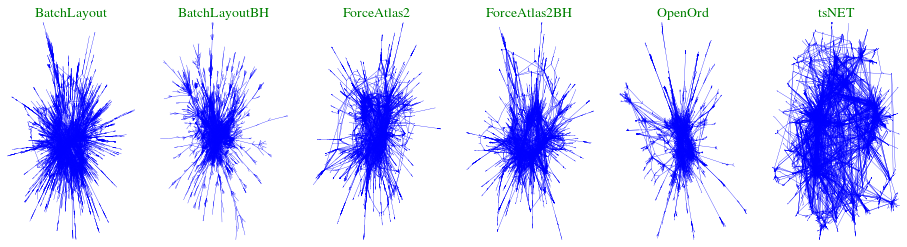

In [102]:
algoBH = readCoordinates("datasets/betteroutput/PGPgiantcompo.mtxBHMINB256PARAOUT5000.txt")
algo2 = readCoordinates("datasets/betteroutput/PGPgiantcompo.mtxCACHEMINB256PARAOUT5000.txt")
openordGH = readCoordinates("datasets/betteroutput/PGPgiantcompo.icoord.txt")
forceatlas2 = readCoordinates("datasets/betteroutput/PGPgiantcompo.mtx.gml_forceatlas2_5000.gml.txt")
forceatlas2bh = readCoordinates("datasets/betteroutput/PGPgiantcompo.mtx.gml_forceatlas2bh_5000.gml.txt")
tsNET = readCoordinates("datasets/betteroutput/PGPgiantcompo.mtx.gml.vna_tsNETs_500.txt")
drawlinegraphA(graph, [algo2, algoBH, forceatlas2, forceatlas2bh,
                       openordGH, tsNET], ["BatchLayout", "BatchLayoutBH" , "ForceAtlas2", 
                                                             "ForceAtlas2BH", "OpenOrd", "tsNET"])

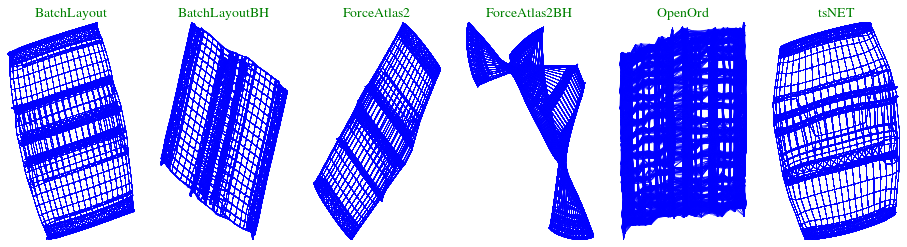

In [104]:
algoBH = readCoordinates("datasets/betteroutput/pkustk02.mtxBHMINB256PARAOUT5000.txt")
algo2 = readCoordinates("datasets/betteroutput/pkustk02.mtxCACHEMINB256PARAOUT5000.txt")
openordGH = readCoordinates("datasets/betteroutput/pkustk02.icoord.txt")
forceatlas2 = readCoordinates("datasets/betteroutput/pkustk02.mtx.gml_forceatlas2_5000.gml.txt")
forceatlas2bh = readCoordinates("datasets/betteroutput/pkustk02.mtx.gml_forceatlas2bh_5000.gml.txt")
tsNET = readCoordinates("datasets/betteroutput/pkustk02.mtx.gml.vna_tsNETs_500.txt")
drawlinegraphA(graph, [algo2, algoBH, forceatlas2, forceatlas2bh,
                       openordGH, tsNET], ["BatchLayout", "BatchLayoutBH" , "ForceAtlas2", 
                                                             "ForceAtlas2BH", "OpenOrd", "tsNET"])

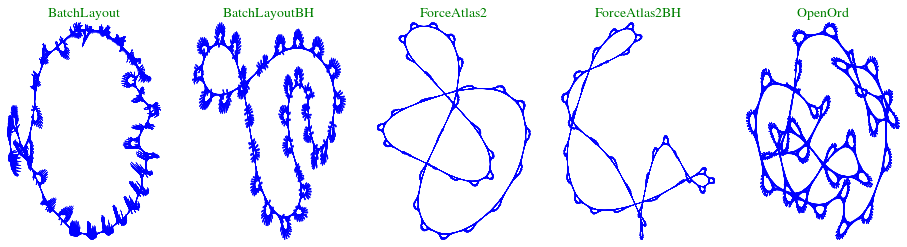

In [112]:
algoBH = readCoordinates("datasets/outputconverged/finan512.mtxBHMINB256PARAOUT2884.txt")
algo2 = readCoordinates("datasets/outputconverged/finan512.mtxCACHEMINB256PARAOUT2884.txt")
openordGH = readCoordinates("datasets/outputconverged/finan512.icoord.txt")
forceatlas2 = readCoordinates("datasets/outputconverged/finan512.mtx.gml_forceatlas2_2884.gml.txt")
forceatlas2bh = readCoordinates("datasets/outputconverged/finan512.mtx.gml_forceatlas2bh_2884.gml.txt")
drawlinegraphA(graph, [algo2, algoBH, forceatlas2, forceatlas2bh,
                       openordGH], ["BatchLayout", "BatchLayoutBH" , "ForceAtlas2", 
                                                             "ForceAtlas2BH", "OpenOrd"])

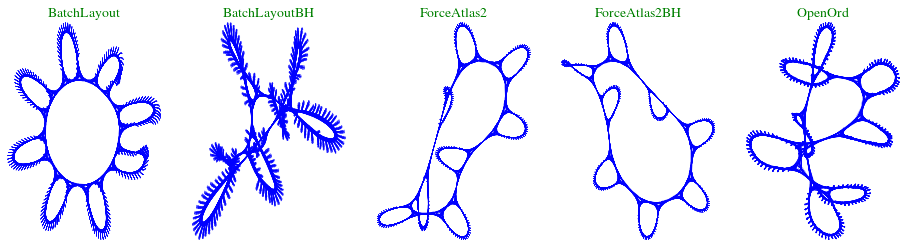

In [110]:
algoBH = readCoordinates("datasets/outputconverged/finance256.mtxBHMINB256PARAOUT3747.txt")
algo2 = readCoordinates("datasets/outputconverged/finance256.mtxCACHEMINB256PARAOUT3747.txt")
openordGH = readCoordinates("datasets/outputconverged/finance256.icoord.txt")
forceatlas2 = readCoordinates("datasets/outputconverged/finance256.mtx.gml_forceatlas2_3747.gml.txt")
forceatlas2bh = readCoordinates("datasets/outputconverged/finance256.mtx.gml_forceatlas2bh_3747.gml.txt")
drawlinegraphA(graph, [algo2, algoBH, forceatlas2, forceatlas2bh,
                       openordGH], ["BatchLayout", "BatchLayoutBH" , "ForceAtlas2", 
                                                             "ForceAtlas2BH", "OpenOrd", "tsNET"])